<a href="https://colab.research.google.com/github/ankitashrivastav12/ML-MODELS/blob/main/Program_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:11<00:00, 137MB/s]
100% 1.06G/1.06G [00:11<00:00, 103MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
train= keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test= keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
625/625 [==============================] - 54s 85ms/step - loss: 0.0950 - accuracy: 0.9731 - val_loss: 2.3645 - val_accuracy: 0.6178
Epoch 2/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0883 - accuracy: 0.9745 - val_loss: 2.4905 - val_accuracy: 0.6408
Epoch 3/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0727 - accuracy: 0.9788 - val_loss: 2.3833 - val_accuracy: 0.6410
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0666 - accuracy: 0.9814 - val_loss: 2.4316 - val_accuracy: 0.6416
Epoch 5/10
625/625 [==============================] - 49s 78ms/step - loss: 0.0838 - accuracy: 0.9765 - val_loss: 2.6678 - val_accuracy: 0.6408
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0582 - accuracy: 0.9850 - val_loss: 2.4419 - val_accuracy: 0.6236
Epoch 7/10
625/625 [==============================] - 50s 79ms/step - loss: 0.0535 - accuracy: 0.9847 - val_loss: 2.8792 - val_accuracy:

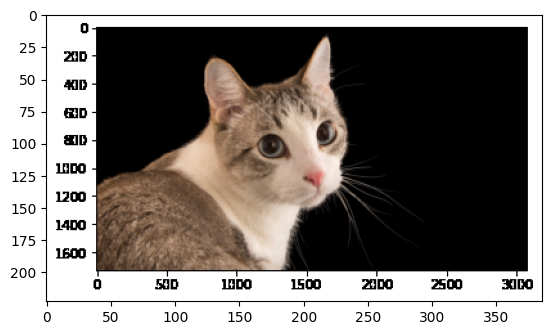

In [ ]:
import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread('/content/cat.png')
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 367ms/step


array([[0.]], dtype=float32)